## 패키지 Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from keras.preprocessing import image

import os
import cv2
import PIL
import shutil
import keras

import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
# 이미지 데이터 증강
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 옵티마이저
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 압축 풀기
# %cd 압축을 풀 경로
# !unzip -qq "압축파일 Path"

%cd /content/drive/MyDrive/6dogma/res
!unzip -qq "/content/drive/MyDrive/6dogma/res/resized.zip"

/content/drive/MyDrive/6dogma/res


## 이미지 데이터 불러오기

In [ ]:
# 기본 경로
base_dir = '/content/drive/MyDrive/6dogma_sy/res/resized_aug/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 Good/Bad 이미지 경로
train_G_dir = os.path.join(train_dir, 'Good')
train_B_dir = os.path.join(train_dir, 'bad')
print(train_G_dir, train_B_dir)

# 테스트용 Good/Bad 이미지 경로
test_G_dir = os.path.join(test_dir, 'Good')
test_B_dir = os.path.join(test_dir, 'bad')
print(test_G_dir, test_B_dir)

/content/drive/MyDrive/6dogma_sy/res/resized_aug/train/Good /content/drive/MyDrive/6dogma_sy/res/resized_aug/train/bad
/content/drive/MyDrive/6dogma_sy/res/resized_aug/test/Good /content/drive/MyDrive/6dogma_sy/res/resized_aug/test/bad


In [ ]:
# 훈련용 이미지 파일 이름 조회

train_G_fnames = os.listdir(train_G_dir)
train_B_fnames = os.listdir(train_B_dir)
print(train_G_fnames)
print(train_B_fnames)

['KEMP_IMG_DATA_1107.png', 'KEMP_IMG_DATA_1106.png', 'KEMP_IMG_DATA_1108.png', 'KEMP_IMG_DATA_111.png', 'KEMP_IMG_DATA_1109.png', 'KEMP_IMG_DATA_1110.png', 'KEMP_IMG_DATA_1112.png', 'KEMP_IMG_DATA_1111.png', 'KEMP_IMG_DATA_1113.png', 'KEMP_IMG_DATA_1115.png', 'KEMP_IMG_DATA_1117.png', 'KEMP_IMG_DATA_1118.png', 'KEMP_IMG_DATA_1119.png', 'KEMP_IMG_DATA_112.png', 'KEMP_IMG_DATA_1122.png', 'KEMP_IMG_DATA_1124.png', 'KEMP_IMG_DATA_1126.png', 'KEMP_IMG_DATA_1125.png', 'KEMP_IMG_DATA_1127.png', 'KEMP_IMG_DATA_1129.png', 'KEMP_IMG_DATA_1128.png', 'KEMP_IMG_DATA_113.png', 'KEMP_IMG_DATA_1133.png', 'KEMP_IMG_DATA_1134.png', 'KEMP_IMG_DATA_1135.png', 'KEMP_IMG_DATA_1136.png', 'KEMP_IMG_DATA_1138.png', 'KEMP_IMG_DATA_1139.png', 'KEMP_IMG_DATA_114.png', 'KEMP_IMG_DATA_1140.png', 'KEMP_IMG_DATA_1141.png', 'KEMP_IMG_DATA_1144.png', 'KEMP_IMG_DATA_1145.png', 'KEMP_IMG_DATA_1146.png', 'KEMP_IMG_DATA_1147.png', 'KEMP_IMG_DATA_1148.png', 'KEMP_IMG_DATA_1149.png', 'KEMP_IMG_DATA_1150.png', 'KEMP_IMG_DATA_

In [ ]:
# 각 디렉토리에 저장되어 있는 이미지 파일 수 확인

print('Total training G images :', len(os.listdir(train_G_dir)))
print('Total training B images :', len(os.listdir(train_B_dir)))

print('Total test G images :', len(os.listdir(test_G_dir)))
print('Total test B images :', len(os.listdir(test_B_dir)))

Total training G images : 1102
Total training B images : 649
Total test G images : 275
Total test B images : 164


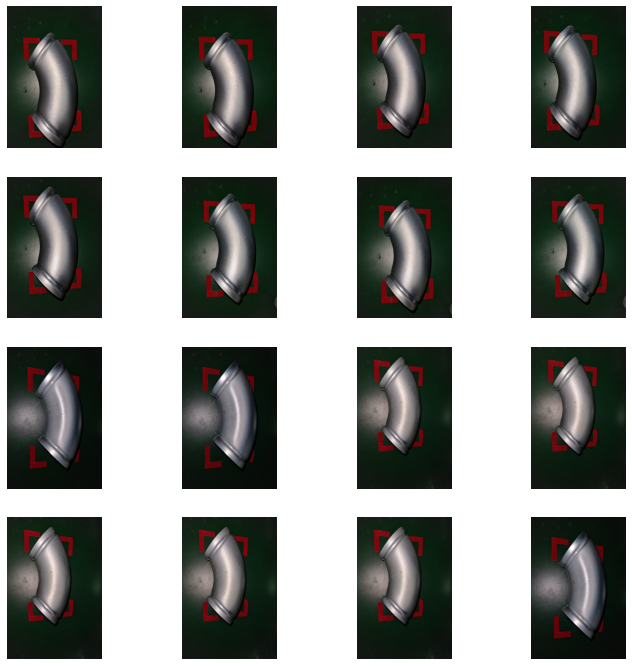

In [ ]:
# 이미지 확인

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_G_pix = [os.path.join(train_G_dir, fname) for fname in train_G_fnames[pic_index-8:pic_index]]
next_B_pix = [os.path.join(train_B_dir, fname) for fname in train_B_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_G_pix+next_B_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

## 이미지 데이터 생성

In [ ]:
# 이미지 정규화
train_datagen = ImageDataGenerator(rescale = 1./255) # 모든 이미지 원소값들을 255로 나누기

                                  
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [ ]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=64, # 한번에 변환된 이미지 64개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(256,256)) # target_size에 맞춰서 이미지의 크기가 조절된다

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=32,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(256,256))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 1751 images belonging to 2 classes.
Found 439 images belonging to 2 classes.


In [ ]:
# class 확인
train_generator.class_indices

{'Good': 0, 'bad': 1}

## Augmentation 적용 확인

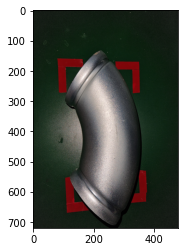

In [ ]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_G_pix[0])
plt.imshow(sample_img)
plt.show()

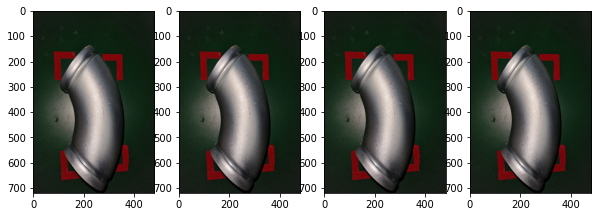

In [ ]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [ ]:
sample_img.shape

(720, 480, 4)

## 모델링

- 합성곱 신경망 모델 구성
- 출력층의 활성화함수로 'sigmoid' 사용
  - 0과 1 두 가지로 분류되는 'binary' 분류 문제에 적합하기 때문

In [ ]:
# 합성곱 신경망 모델 구성하기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

## 모델 학습

- 손실 함수로 ‘binary_crossentropy’를 사용
- 옵티마이저로는 RMSprop을 사용
  - RMSprop(Root Mean Square Propagation) 알고리즘은 훈련 과정 중에 학습률을 적절하게 변화시켜 줌

In [ ]:
# 모델 컴파일
# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])

In [ ]:
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=test_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=16, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=30, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=16, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30


16/16 - 25s - loss: 0.8259 - accuracy: 0.6256 - val_loss: 0.3347 - val_accuracy: 0.9499 - 25s/epoch - 2s/step
Epoch 2/30
16/16 - 15s - loss: 0.2638 - accuracy: 0.9084 - 15s/epoch - 912ms/step
Epoch 3/30
16/16 - 15s - loss: 0.0521 - accuracy: 0.9858 - 15s/epoch - 922ms/step
Epoch 4/30
16/16 - 15s - loss: 0.0875 - accuracy: 0.9583 - 15s/epoch - 918ms/step
Epoch 5/30
16/16 - 15s - loss: 0.0231 - accuracy: 0.9922 - 15s/epoch - 957ms/step
Epoch 6/30
16/16 - 15s - loss: 0.0032 - accuracy: 1.0000 - 15s/epoch - 953ms/step
Epoch 7/30
16/16 - 15s - loss: 9.2679e-04 - accuracy: 1.0000 - 15s/epoch - 915ms/step
Epoch 8/30
16/16 - 15s - loss: 3.4698e-04 - accuracy: 1.0000 - 15s/epoch - 920ms/step
Epoch 9/30
16/16 - 15s - loss: 0.0500 - accuracy: 0.9847 - 15s/epoch - 915ms/step
Epoch 10/30
16/16 - 15s - loss: 5.8238e-04 - accuracy: 1.0000 - 15s/epoch - 917ms/step
Epoch 11/30
16/16 - 15s - loss: 1.5850e-04 - accuracy: 1.0000 - 15s/epoch - 915ms/step
Epoch 12/30
16/16 - 15s - loss: 9.8296e-05 - accurac

In [ ]:
history

## 모델 평가

In [ ]:
# 모델 성능 평가 (훈련 데이터)
model.evaluate(train_generator)

28/28 [==============================] - 26s 928ms/step - loss: 3.2628e-06 - accuracy: 1.0000


[3.26279428009002e-06, 1.0]

In [ ]:
# 모델 성능 평가 (테스트 데이터)
model.evaluate(test_generator)

14/14 [==============================] - 7s 467ms/step - loss: 1.1757e-11 - accuracy: 1.0000


[1.1757299127335141e-11, 1.0]

ValueError: ignored

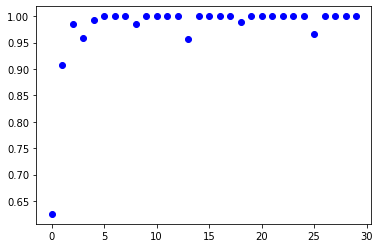

In [ ]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 17ms/step


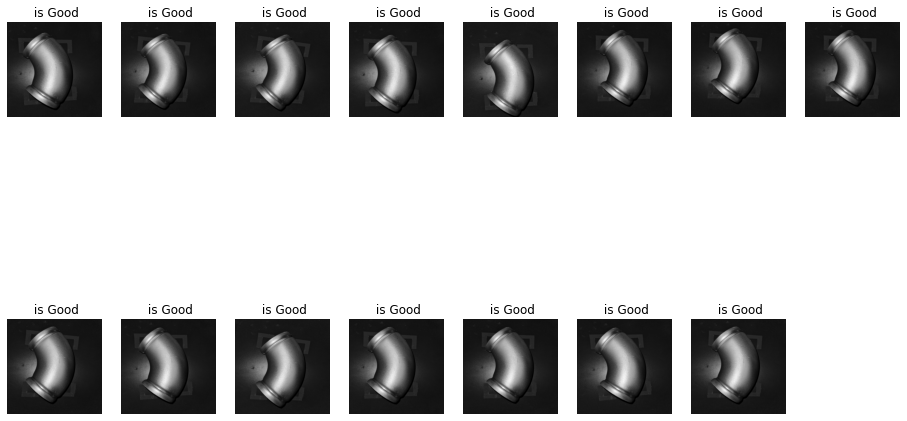

1/1 [==============================] - 0s 17ms/step


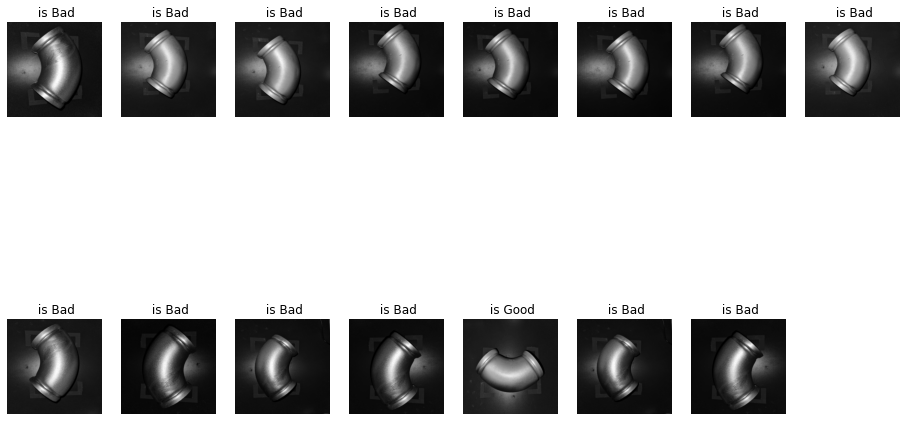

In [ ]:
# 테스트 평가
from keras.preprocessing import image

# 테스트용 Good 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/only_test/'
test_G_dir = os.path.join(test_dir, 'Good/')
test_G_filenames = os.listdir(test_G_dir)
test_G_filenames

# 테스트용 Bad 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/only_test/'
test_B_dir = os.path.join(test_dir, 'bad/')
test_B_filenames = os.listdir(test_B_dir)
test_B_filenames

# Good,bad를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_GB_filenames = {}
dic_GB_filenames['Good'] = test_G_filenames
dic_GB_filenames['bad'] = test_B_filenames

# Good/Bad 분류 테스트
for GB, filenames in dic_GB_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 2, 8
    for i, fn in enumerate(filenames):
        path = test_dir + GB + '/' + fn
        test_img = keras.utils.load_img(path, color_mode='grayscale', target_size=(256, 256), interpolation='bilinear')        
        x = keras.utils.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=16)
        
        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            # plt.title(fn + " is Good")
            plt.title(" is Good")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')

        else:
            plt.title(" is Bad")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/6dogma_sy/model/GB_class_cnn.h5')
print(type(loaded_model))

<class 'keras.engine.sequential.Sequential'>


In [ ]:
# test 파일 그대로 넣은 경우

from keras.preprocessing import image

# 테스트용 Good 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/resized_aug/test/'
test_G_dir = os.path.join(test_dir, 'Good/')
test_G_filenames = os.listdir(test_G_dir)
test_G_filenames

# 테스트용 Bad 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/resized_aug/test/'
test_B_dir = os.path.join(test_dir, 'bad/')
test_B_filenames = os.listdir(test_B_dir)
test_B_filenames

# Good,bad를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_GB_filenames = {}
dic_GB_filenames['Good'] = test_G_filenames
dic_GB_filenames['bad'] = test_B_filenames


G_list = []
B_list = []
# Good/Bad 분류 테스트
for GB, filenames in dic_GB_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 2, 276



    for i, fn in enumerate(filenames):
        path = test_dir + GB + '/' + fn
        test_img = keras.utils.load_img(path, color_mode='grayscale', target_size=(256, 256), interpolation='bilinear')        
        x = keras.utils.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = loaded_model.predict(images, batch_size=16)
        

        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            # plt.title(fn + " is Good")
            plt.title(" is Good")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
            tmp = classes.tolist()


        else:
            plt.title(" is Bad")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
            tmp = classes.tolist()
            
        
        if GB == 'Good':
          G_list.append(tmp[0][0])
        else:
          B_list.append(tmp[0][0])

    # plt.show()
    # print(G_list)
    # print(B_list)

In [ ]:
print(f'양품 판별률 : {G_list.count(0)}/{len(G_list)} = {(G_list.count(0)/len(G_list))*100:.2f}%')
print(f'불량 판별률 : {B_list.count(1)}/{len(B_list)} = {(B_list.count(1)/len(B_list))*100:.2f}%')
print(f'전체 정확도 : {G_list.count(0)+B_list.count(1)}/{len(G_list)+len(B_list)} = {(G_list.count(0)+B_list.count(1))/(len(G_list)+len(B_list))*100:.2f}%')
print(f'전체 오차율 : {G_list.count(1)+B_list.count(0)}/{len(G_list)+len(B_list)} = {(G_list.count(1)+B_list.count(0))/(len(G_list)+len(B_list))*100:.2f}%')

양품 판별률 : 275/275 = 100.00%
불량 판별률 : 164/164 = 100.00%
전체 정확도 : 439/439 = 100.00%
전체 오차율 : 0/439 = 0.00%


In [ ]:
# 파일 압축 풀기
# %cd 압축을 풀 경로
# !unzip -qq "압축파일 Path"

%cd /content/drive/MyDrive/6dogma_sy/res
!unzip -qq "/content/drive/MyDrive/6dogma_sy/res/resized.zip"

/content/drive/MyDrive/6dogma_sy/res


In [ ]:
# 증강 안 한 원본 test 데이터

from keras.preprocessing import image

# 테스트용 Good 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/resized/test/'
test_G_dir = os.path.join(test_dir, 'Good/')
test_G_filenames = os.listdir(test_G_dir)
test_G_filenames

# 테스트용 Bad 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/resized/test/'
test_B_dir = os.path.join(test_dir, 'bad/')
test_B_filenames = os.listdir(test_B_dir)
test_B_filenames

# Good,bad를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_GB_filenames = {}
dic_GB_filenames['Good'] = test_G_filenames
dic_GB_filenames['bad'] = test_B_filenames


G_list = []
B_list = []
# Good/Bad 분류 테스트
for GB, filenames in dic_GB_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 2, 276



    for i, fn in enumerate(filenames):
        path = test_dir + GB + '/' + fn
        test_img = keras.utils.load_img(path, color_mode='grayscale', target_size=(256, 256), interpolation='bilinear')        
        x = keras.utils.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = loaded_model.predict(images, batch_size=16)
        

        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            # plt.title(fn + " is Good")
            plt.title(" is Good")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
            tmp = classes.tolist()


        else:
            plt.title(" is Bad")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
            tmp = classes.tolist()
            
        
        if GB == 'Good':
          G_list.append(tmp[0][0])
        else:
          B_list.append(tmp[0][0])

    # plt.show()
    # print(G_list)
    # print(B_list)

In [ ]:
print(f'양품 판별률 : {G_list.count(0)}/{len(G_list)} = {(G_list.count(0)/len(G_list))*100:.2f}%')
print(f'불량 판별률 : {B_list.count(1)}/{len(B_list)} = {(B_list.count(1)/len(B_list))*100:.2f}%')
print(f'전체 정확도 : {G_list.count(0)+B_list.count(1)}/{len(G_list)+len(B_list)} = {(G_list.count(0)+B_list.count(1))/(len(G_list)+len(B_list))*100:.2f}%')
print(f'전체 오차율 : {G_list.count(1)+B_list.count(0)}/{len(G_list)+len(B_list)} = {(G_list.count(1)+B_list.count(0))/(len(G_list)+len(B_list))*100:.2f}%')

양품 판별률 : 276/276 = 100.00%
불량 판별률 : 14/15 = 93.33%
전체 정확도 : 290/291 = 99.66%
전체 오차율 : 1/291 = 0.34%


1/1 [==============================] - 0s 18ms/step


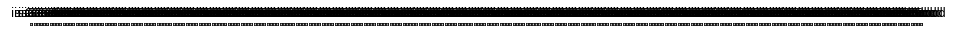

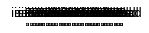

In [ ]:
# 원본 test 데이터 2배 증강 -> 총 30개
from keras.preprocessing import image

# 테스트용 Good 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/resized/test/'
test_G_dir = os.path.join(test_dir, 'Good/')
test_G_filenames = os.listdir(test_G_dir)
test_G_filenames

# 테스트용 Bad 이미지 경로 설정
test_dir = '/content/drive/MyDrive/6dogma_sy/res/resized/test/'
test_B_dir = os.path.join(test_dir, 'bad/')
test_B_filenames = os.listdir(test_B_dir)
test_B_filenames

# Good,bad를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_GB_filenames = {}
dic_GB_filenames['Good'] = test_G_filenames
dic_GB_filenames['bad'] = test_B_filenames


G_list = []
B_list = []
# Good/Bad 분류 테스트
for GB, filenames in dic_GB_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 2, 276



    for i, fn in enumerate(filenames):
        path = test_dir + GB + '/' + fn
        test_img = keras.utils.load_img(path, color_mode='grayscale', target_size=(256, 256), interpolation='bilinear')        
        x = keras.utils.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = loaded_model.predict(images, batch_size=16)
        

        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            # plt.title(fn + " is Good")
            plt.title(" is Good")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
            tmp = classes.tolist()


        else:
            plt.title(" is Bad")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
            tmp = classes.tolist()
            
        
        if GB == 'Good':
          G_list.append(tmp[0][0])
        else:
          B_list.append(tmp[0][0])

    # plt.show()
    # print(G_list)
    # print(B_list)

In [ ]:
print(f'양품 판별률 : {G_list.count(0)}/{len(G_list)} = {(G_list.count(0)/len(G_list))*100:.2f}%')
print(f'불량 판별률 : {B_list.count(1)}/{len(B_list)} = {(B_list.count(1)/len(B_list))*100:.2f}%')
print(f'전체 정확도 : {G_list.count(0)+B_list.count(1)}/{len(G_list)+len(B_list)} = {(G_list.count(0)+B_list.count(1))/(len(G_list)+len(B_list))*100:.2f}%')
print(f'전체 오차율 : {G_list.count(1)+B_list.count(0)}/{len(G_list)+len(B_list)} = {(G_list.count(1)+B_list.count(0))/(len(G_list)+len(B_list))*100:.2f}%')

양품 판별률 : 276/276 = 100.00%
불량 판별률 : 28/30 = 93.33%
전체 정확도 : 304/306 = 99.35%
전체 오차율 : 2/306 = 0.65%
